<a href="https://colab.research.google.com/github/BaThienPhan/AIO_Excises_Module_2/blob/feature_week2/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Operation with vecto and matrix**

 1.1. Length of a vector

In [ ]:
import numpy as np
def compute_vector_length(vector):
    return np.sqrt(np.sum(vector**2))
arr = np.array([1,2,2])
compute_vector_length(arr)

3.0

1.2. Dot product

In [ ]:
def compute_dot_product(vector1, vector2):
    return np.sum(vector1*vector2)
arr1 = np.array([1,2,2])
arr2 = np.array([1,2,2])
compute_dot_product(arr1, arr2)

9

1.3. Multiplying a vector by a matrix

In [ ]:
def matrix_multi_vector(matrix, vector):
    return np.dot(matrix, vector)

1.4. Multiplying a matrix by a matrix

In [ ]:
import numpy as np
def matrix_multi_matrix(matrix1, matrix2):
    return np.dot(matrix1, matrix2)
arr1 = np.array([[1,2,2],[1,2,2]])
arr2 = np.array([[1,2,2],[1,2,2],[1,1,1]])
matrix_multi_matrix(arr1, arr2)

array([[5, 8, 8],
       [5, 8, 8]])

 1.5 Matrix inverse

In [ ]:
import numpy as np
def inverse_matrix(matrix):
    return np.linalg.inv(matrix)
arr = np.array([[1,0,0],[0,1,0],[0,0,1]])
inverse_matrix(arr)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2.Eigenvector và eigenvalues:

In [ ]:
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors


3.CosineSimilarity:

 3.1.CosineSimilarity

In [ ]:
def compute_cosine(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


 4.Backgroundsubtraction

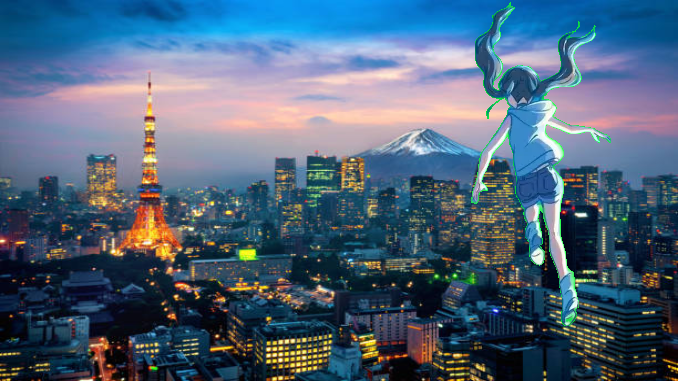

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# (a) Resize các ảnh đầu vào về cùng kích thước:
def resize_images(bg1_path, ob_path, bg2_path, size=(678, 381)):
    bg1_image = cv2.imread(bg1_path, 1)
    ob_image = cv2.imread(ob_path, 1)
    bg2_image = cv2.imread(bg2_path, 1)

    bg1_image = cv2.resize(bg1_image, size)
    ob_image = cv2.resize(ob_image, size)
    bg2_image = cv2.resize(bg2_image, size)

    return bg1_image, ob_image, bg2_image

# (b) Xây dựng hàm compute_difference():
def compute_difference(bg_img, input_img):
    difference = cv2.absdiff(bg_img, input_img)
    # Chuyển ảnh sự khác biệt thành ảnh grayscale
    difference_single_channel = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    return difference_single_channel

# (c) Xây dựng hàm compute_binary_mask():
def compute_binary_mask(difference_single_channel):
    _, difference_binary = cv2.threshold(difference_single_channel, 15, 255, cv2.THRESH_BINARY)
    return difference_binary

# (d) Xây dựng hàm replace_background():
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)

    # Chuyển binary mask thành 3 kênh để áp dụng lên ảnh màu
    binary_mask_3channel = cv2.merge([binary_mask, binary_mask, binary_mask])

    # Tạo ảnh output
    output = np.where(binary_mask_3channel == 255, ob_image, bg2_image)

    return output

# Đường dẫn tới các ảnh
bg1_path = '/content/drive/MyDrive/Exercise/Module 2/week 2/GreenBackground.png'
ob_path = '/content/drive/MyDrive/Exercise/Module 2/week 2/Object.png'
bg2_path = '/content/drive/MyDrive/Exercise/Module 2/week 2/NewBackground.jpg'

# Resize các ảnh đầu vào
bg1_image, ob_image, bg2_image = resize_images(bg1_path, ob_path, bg2_path)

# Thay thế background
output_image = replace_background(bg1_image, bg2_image, ob_image)

# Lưu và hiển thị ảnh output
output_path = '/content/drive/MyDrive/Exercise/Module 2/week 2/output_image.png'
cv2.imwrite(output_path, output_image)
cv2_imshow(output_image)